In [335]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt

In [336]:

class LogisticRegression:
    def __init__(self, lr = 0.01, lamb = 10, num_iter = 1000, fit_intercept = True):
        self.lr = lr
        self.lamb = lamb
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    def __add_intercept(self, X):
        #Adds the 
        intercept = np.ones((X.shape[0], 1))
        #adds the column of 1 at the beginning of the array, X is just the loop of the training data
        return np.concatenate((intercept, X), axis=1)
    def __sigmoid(self, z):
        '''***Define Sigmoid Function here. z is a vector***'''
        sigmoid = 1/(1+np.e**(-z))
        return sigmoid
    def fit(self, X, y):
        #Set up the randomized weight vector of size d for x size vector
        np.random.seed(0)
        weights = np.random.normal(1,0.33,X.shape[1])
        w_0 = np.asarray(0).reshape(1)
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # theta initialization as a column vector, given w0 and the weights initialization
        self.theta = np.concatenate((w_0,weights),axis=0)
        for i in range(self.num_iter):
            #each of the X vectors will be a row vector, will give back a n x 1 matrix
            # print(f'shape of X: {X.shape}')
            #print(f'shape of theta: {self.theta.shape}')
            z = np.matmul(X,self.theta)
            a = self.__sigmoid(z)
            # print(f'shape of z: {z.shape}')
            # print(f'shape of a: {a.shape}')
            # print(f'shape of Y: {y.shape}')
            '''***[Critical Step] - Using the formula in question prompt define gradient in vector form***'''
            #vector to set up what the total will be
            vec = np.zeros(X.shape[1])
            #Loop through all of the rows
            for j in range(X.shape[1]):
                #get the leading coefficient
                #from equation (a-y) vectors
                leadco = a[j]-y[j] 
                #sum vector is lead co by the current X row with all columns in it
                vec += leadco*X[j,:]
            #normalize the vec vector
            vec = vec/X.shape[0]
            #Make sure the vector is a column vector before adding them together
            vec = np.asarray(vec).transpose()
            #Regularization term, #column vector
            #make sure the reg theta term does not have the bias point in it
            reg_vec = np.zeros_like(self.theta)
            reg_vec[1:] = 2*self.lamb*self.theta[1:]
            #Getting the gradient vector
            gradient = vec + reg_vec
            grad_new = gradient
            if i == 1:
                grad_old = np.zeros(X.shape[1])
            if i != 1:
                grad_old = grad_new
            #print(grad_old-grad_new)
            '''***[Critical Step] - Update theta using the gradient and learning rate***'''
            #need an implementation of theta, theta is our weights + the 1 at the front, basically the w_tilde from equation
            self.theta -= -gradient*self.lr
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    def predict(self, X, threshold):
        ''' This function outputs the predicted labels'''
        # usually we take threshold as 0.5
        return self.predict_prob(X) >= threshold
    def report_weights(self):
        return self.theta
    

In [337]:
#Loading the data
import pandas as pd
data = np.genfromtxt('assignment2/ex2data2.txt',delimiter=',',dtype=float)

X_var = data[:,:-1]
Y_var = data[:,-1].reshape(data.shape[0],1)
X_1 = X_var[:,0].reshape(X_var.shape[0],1)
X_2 = X_var[:,1].reshape(X_var.shape[0],1)

#desired number of polynomial orders
poly = [2,3,4,5,6]
#Loop through all desired polys
for i in poly:
    #first order poly we can skip because it is given in X_var
    for j in range(i+1):
        #will loop through 0,1...poly
        var1 = X_1**(i-j)
        var2 = X_2**(j)
        X_var = np.concatenate((X_var,np.asarray(var1*var2)),axis=1)

#Putt all the data back together so we can shuffle it
data_mapped = np.concatenate((X_var,Y_var),axis=1)

#Randomize the data 
np.random.seed(0) #setting the random seed
rp = np.random.permutation(data_mapped.shape[0]) #random set of the indices given the seed
z = data_mapped[rp,:]#shuffling the rows of the data
x = z[:,:-1] #all but the last index of label
y = z[:,-1] #only the last row

#Now we have the data into a randomized form from before using this random function

#Now let us split this up into the train and test split, for this we are going to use an 90,10 split to keep it easy enough
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1,random_state=None)

print(len(X_train))

106


In [344]:
'''***Select an appropriate lambda parameter***'''
model = LogisticRegression(lamb = 0.1,lr=0.01)
model.fit(X_train, y_train)
# Generate Predictions
preds = model.predict(X_test, threshold = 0.5)
weights = model.report_weights()
print(weights)
# accuracy
'''***As you try different lambda observe and report how accuracy changes***'''
(preds == y_test).mean()


[ 0.37620791 12.32408917  9.37389056 10.36414306 12.84821886 12.9255055
  5.31889921  9.70218216  7.23600405  7.85762946  8.73446975  7.61169948
 11.17129895  9.27403459  8.32126492  8.6539494   8.12759363 11.10542097
  6.93971867  8.25157146  5.80593824  1.384425    8.87128359  9.60455554
  5.53185551 13.01313509  3.89307057  7.92647685]


0.3333333333333333

C:\Users\Eric_Larsen\AppData\Local\Temp\ipykernel_16916\4018602432.py:14: RuntimeWarning: overflow encountered in power
  sigmoid = 1/(1+np.e**(-z))


Text(0, 0.5, 'Accuracy')

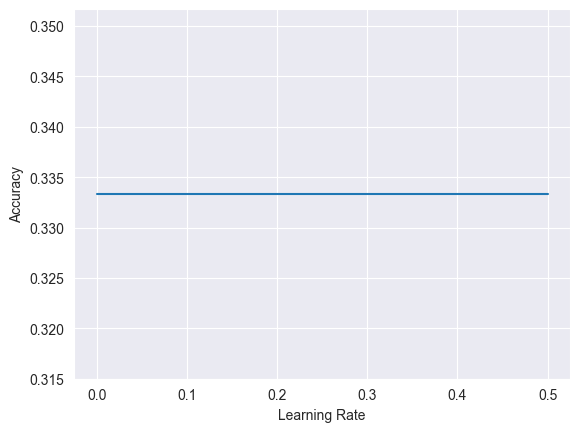

In [339]:
#Looping through and trying different learning rates
n = 60
learning_rates = np.linspace(0,0.5,num=n)
acc_array=[]
for i in learning_rates:
    model = LogisticRegression(lamb=0.1,lr=i)
    model.fit(X_train,y_train)
    preds = model.predict(X_test,threshold=0.5)
    #accuracry score
    acc_array.append( (preds == y_test).mean())

#Plotting the results

plt.figure()
plt.plot(learning_rates,acc_array,label='test acc')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
    

LR Error: 0.25


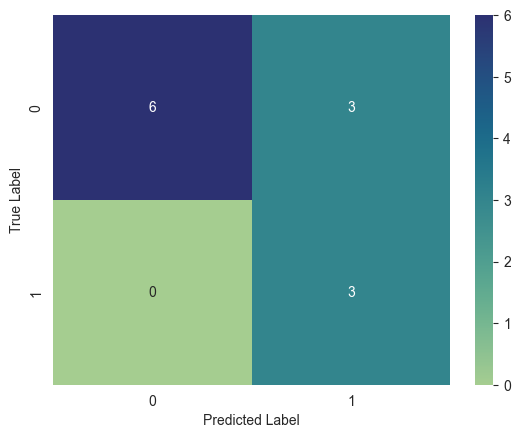

In [343]:
#Okay we need a sanity check, so we are going to use a built in function for this to check
import sklearn.metrics as skm
from sklearn.linear_model import LogisticRegression as LR
import seaborn as sn
#Fit the model
model = LR(C=0.1,penalty='l2')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#get confusion matrix
cm = skm.confusion_matrix(y_test,y_pred)

CM_LR_fig = plt.figure()
sn.heatmap(cm,annot=True,cmap='crest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('assignment2/CM_LR.png',dpi=300)
print(f'LR Error: {round(1- np.sum(np.diag(cm))/np.sum(cm),5)}')